In [ ]:
# import libary
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

#**Task 1**

*Dataset1.csv - a synthetic dataset including 5 points (1-dimensional data) with one target*

In [ ]:
df_dataset1 = pd.read_csv('drive/MyDrive/data/lab3/dataset1.csv')
df_dataset1.head()

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


*1.1. Apply LinearRegression to the dataset1. Report coefficients*

In [ ]:
x_train_dataset1 = df_dataset1[['x']]
y_train_dataset1 = df_dataset1[['y']]

linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train_dataset1, y_train_dataset1)

intercept = linear_regression_model.intercept_
coefficients = linear_regression_model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: [0.4]
Coefficients: [[0.8]]


*1.2. Visualize the training set and predictions obtained from the above model*

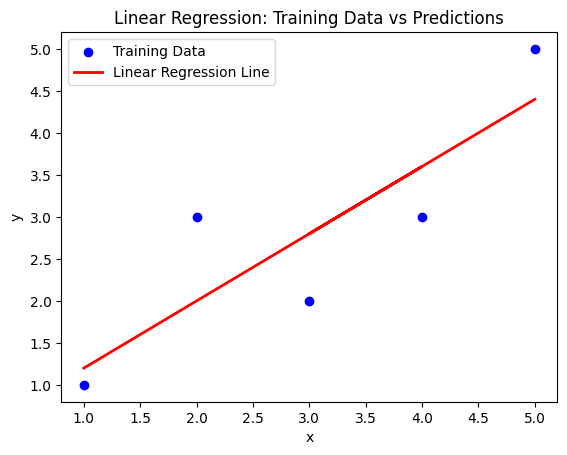

In [ ]:
y_train_dataset1_pred = linear_regression_model.predict(x_train_dataset1)

plt.scatter(x_train_dataset1, y_train_dataset1, color='blue', label='Training Data')
plt.plot(x_train_dataset1, y_train_dataset1_pred, color='red', linewidth=2, label='Linear Regression Line')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression: Training Data vs Predictions")
plt.legend()
plt.show()

#**Task 2**

*dataset2.csv - a synthetic dataset including 1000 points (3-dimensional data) with one target variable. The variables are named x1, x2, x3, and y. y is the variable to be regressed. Split the dataset into the training and test sets (70% for the training set and 30% for the test set).*

In [ ]:
df_dataset2 = pd.read_csv('drive/MyDrive/data/lab3/dataset2.csv')
df_dataset2.head()

,id,x1,x2,x3,y
0,1,2.41710,0.83595,0.72469,18.21900
1,2,1.98150,-1.01800,-1.06400,0.55271
2,3,1.82850,0.49281,-0.89035,7.00510
3,4,1.50480,-1.74070,-1.72290,-7.06310
4,5,0.27489,-0.31811,-0.56168,0.74380


*2.1. Plot the relationship between combinations (i.e., x1 vs y,x2 vs y, x3 vs y)*

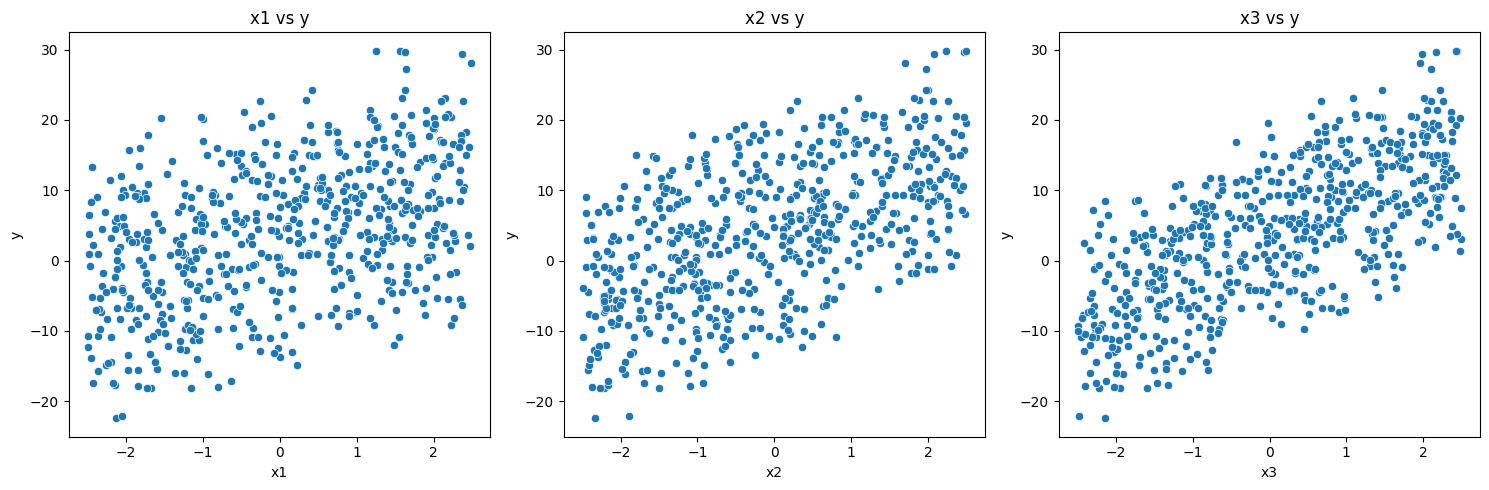

In [ ]:
features = ['x1', 'x2', 'x3']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(features):
    sns.scatterplot(data=df_dataset2, x=feature, y='y', ax=axes[i])
    axes[i].set_title(f"{feature} vs y")

plt.tight_layout()
plt.show()

*2.2. Plot the correlation between features using the heatmap*

<Axes: >

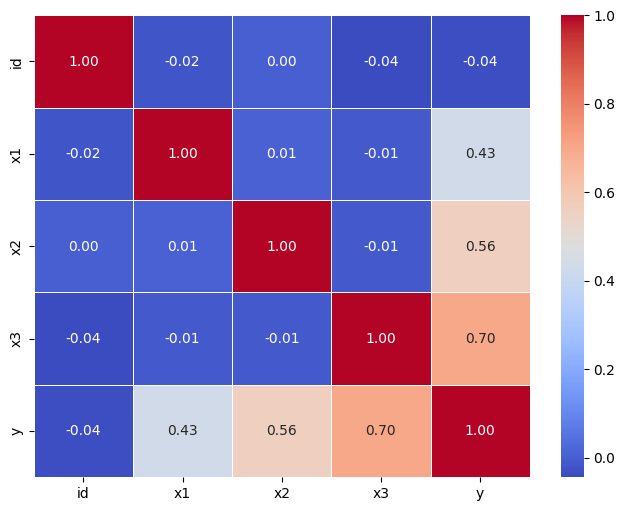

In [ ]:
correlation_matrix = df_dataset2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

*2.3. Apply LinearRegresion to each combination in the task 2.1*

In [ ]:
result_dataset2 = {}
for feature in features:
  x_train_dataset2 = df_dataset2[[feature]]
  y_train_dataset2 = df_dataset2['y']

  linear_regression_model_dataset2 = LinearRegression()
  linear_regression_model_dataset2.fit(x_train_dataset2, y_train_dataset2)
  intercept_dataset2 = linear_regression_model_dataset2.intercept_
  coefficients_dataset2 = linear_regression_model_dataset2.coef_

  result_dataset2[feature] = {
      'intercept': intercept_dataset2,
      'coefficients': coefficients_dataset2[0]
  }

for feature, values in result_dataset2.items():
    print(f"Linear Regression for {feature} vs y:")
    for key, value in values.items():
        print(f"  ➝ {key}: {value:.4f}")
    print()


Linear Regression for x1 vs y:
  ➝ intercept: 3.8205
  ➝ coefficients: 2.9789

Linear Regression for x2 vs y:
  ➝ intercept: 4.3250
  ➝ coefficients: 3.9708

Linear Regression for x3 vs y:
  ➝ intercept: 3.6308
  ➝ coefficients: 4.9224



*2.4. Report the performance of the model trained in the task 2.3*

In [ ]:
for feature in features:
  x_train_dataset2 = df_dataset2[[feature]]
  y_train_dataset2 = df_dataset2[['y']]

  linear_regression_model_dataset2 = LinearRegression()
  linear_regression_model_dataset2.fit(x_train_dataset2, y_train_dataset2)

  y_pred = linear_regression_model_dataset2.predict(x_train_dataset2)

  mae = mean_absolute_error(y_train_dataset2, y_pred)
  mse = mean_squared_error(y_train_dataset2, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_train_dataset2, y_pred)

  result_dataset2[feature] = {
      "MAE": mae,
      "MSE": mse,
      "RMSE": rmse,
      "R2": r2
  }

for feature, metrics in result_dataset2.items():
    print(f"Metrics for {feature} vs y:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

Metrics for x1 vs y:
MAE: 7.4548
MSE: 81.4569
RMSE: 9.0253
R2: 0.1842

Metrics for x2 vs y:
MAE: 6.7825
MSE: 68.5771
RMSE: 8.2811
R2: 0.3132

Metrics for x3 vs y:
MAE: 5.8677
MSE: 50.7865
RMSE: 7.1265
R2: 0.4913



# Task 3

The dataset3 includes information about the chemical properties of different types of wine and how they relate to overall quality. Input variables (based on physicochemical tests):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

Output variable (based on sensory data):
* quality (score between 0 and 10)

*3.1. Load dataset3, apply StandardScaler() to standardize datataset and repare trainning set, test set*

In [ ]:
df_dataset3 = pd.read_csv('drive/MyDrive/data/lab3/dataset3.csv')
df_dataset3.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.000,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,9.951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,9.9,6


In [ ]:
df_dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   object 
 11  quality               4898 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 459.3+ KB


In [ ]:

for column in df_dataset3.columns:
  df_dataset3[column] = pd.to_numeric(df_dataset3[column], errors='coerce')

# df_dataset3.fillna(df_dataset3.mean(), inplace=True)

standard_scaler = StandardScaler()

X = df_dataset3.iloc[:, :-1]
y = df_dataset3.iloc[:, -1]

x_scaled = standard_scaler.fit_transform(X)

X_train_dataset3, X_test_dataset3, y_train_dataset3, y_test_dataset3 = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train_dataset3.shape)
print("y_train shape:", y_train_dataset3.shape)
print("X_test shape:", X_test_dataset3.shape)
print("y_test shape:", y_test_dataset3.shape)

X_train shape: (3918, 11)
y_train shape: (3918,)
X_test shape: (980, 11)
y_test shape: (980,)


*3.2. Plot the correlation between features using the heatmap*

<Axes: >

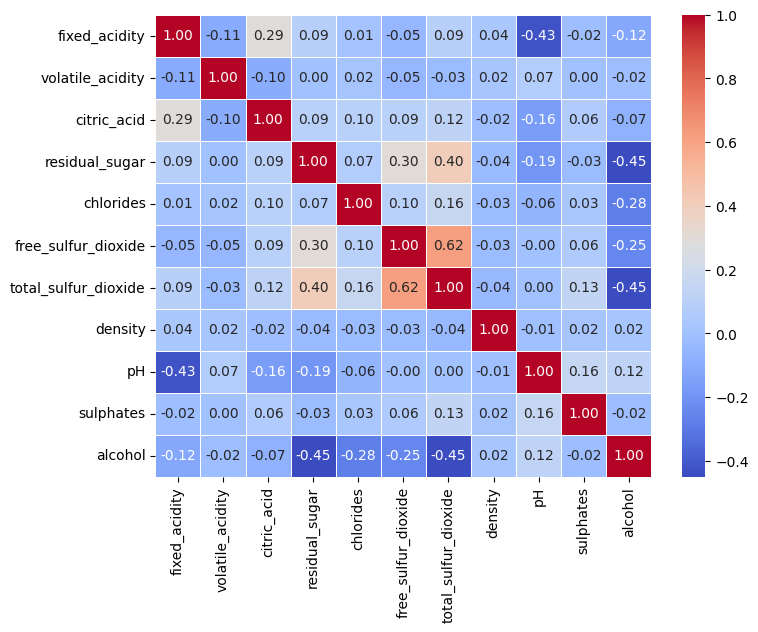

In [ ]:
correlation_matrix_dataset3 = df_dataset3.corr()

plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix_dataset3, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
sns.heatmap(pd.DataFrame(x_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

*3.3. Apply Linear Regression to the preprocessed dataset*

In [ ]:
simple_imputer = SimpleImputer(strategy='mean')
X_train = simple_imputer.fit_transform(X_train_dataset3)
X_test = simple_imputer.transform(X_test_dataset3)

linear_regression_model_dataset3 = LinearRegression()
linear_regression_model_dataset3.fit(X_train_dataset3, y_train_dataset3)

y_pred_dataset3 = linear_regression_model_dataset3.predict(X_test_dataset3)
mse_dataset3 = mean_squared_error(y_test_dataset3, y_pred_dataset3)
r2_dataset3 = r2_score(y_test_dataset3, y_pred_dataset3)

print("MSE:", mse_dataset3)
print("R2 Score:", r2_dataset3)

MSE: 0.6076770315029477
R2 Score: 0.21536719208900335


*3.4. Apply feature selection to find the best features and then train the Regression Model with these best features*

Selected Features: Index(['fixed_acidity', 'chlorides', 'total_sulfur_dioxide', 'pH', 'alcohol'], dtype='object')
R2 Score: 0.19792721347564246


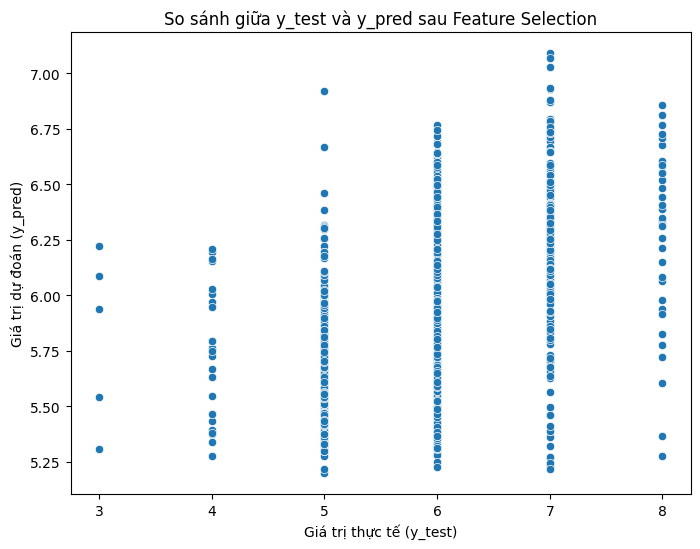

In [ ]:
selector_dataset_3 = SelectKBest(score_func=f_regression, k=5)
X_train_best_selected_dataset3 = selector_dataset_3.fit_transform(X_train_dataset3, y_train_dataset3)
X_test_best_selected_dataset3 = selector_dataset_3.transform(X_test_dataset3)

selected_features = X.columns[selector_dataset_3.get_support()]
print("Selected Features:", selected_features)

linear_regression_model_best_dataset3 = LinearRegression()
linear_regression_model_best_dataset3.fit(X_train_best_selected_dataset3, y_train_dataset3)

y_best_pred_dataset3 = linear_regression_model_best_dataset3.predict(X_test_best_selected_dataset3)

r2_best_dataset3 = r2_score(y_test_dataset3, y_best_pred_dataset3)
print("R2 Score:", r2_best_dataset3)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_dataset3, y=y_best_pred_dataset3)
plt.xlabel("Giá trị thực tế (y_test)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.title("So sánh giữa y_test và y_pred sau Feature Selection")
plt.show()

*3.5. Compare the performance of the models (with and without feature selection) using RMSE, R2*

 Hiệu suất mô hình với tất cả features:
RMSE: 0.7795
R² Score: 0.2154

Hiệu suất mô hình với Feature Selection:
RMSE: 0.7882
R² Score: 0.1979


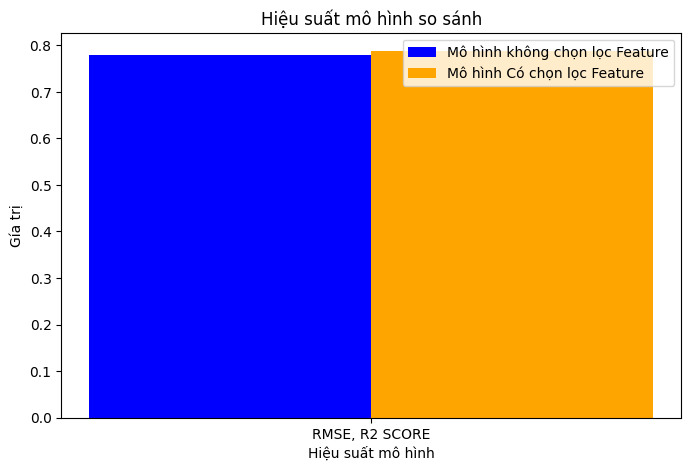

In [ ]:
# NO FEATURE
rmse_dataset3 = np.sqrt(mean_squared_error(y_test_dataset3, y_pred_dataset3))

print(" Hiệu suất mô hình với tất cả features:")
print(f"RMSE: {rmse_dataset3:.4f}")
print(f"R² Score: {r2_dataset3:.4f}")

# FEATURE
rmse_best_dataset3 = np.sqrt(mean_squared_error(y_test_dataset3, y_best_pred_dataset3))

print(f"\nHiệu suất mô hình với Feature Selection:")
print(f"RMSE: {rmse_best_dataset3:.4f}")
print(f"R² Score: {r2_best_dataset3:.4f}")

metrics = {'RMSE, R2 SCORE'}
value_original = [rmse_dataset3, r2_dataset3]
value_best = [rmse_best_dataset3, r2_best_dataset3]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, value_original, width, label='Mô hình không chọn lọc Feature', color='blue')
bars2 = ax.bar(x + width/2, value_best, width, label='Mô hình Có chọn lọc Feature', color='orange')

ax.set_xlabel('Hiệu suất mô hình')
ax.set_ylabel('Gía trị')
ax.set_title('Hiệu suất mô hình so sánh')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Task 4

The dataset4 contains eight attributes (or features, denoted by X1...X8) and two
responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. (see https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)

*4.1. Load dataset4, apply StandardScaler() to standardize datataset and repare trainning set,test set*

In [ ]:
df_dataset4 = pd.read_excel('drive/MyDrive/data/lab3/dataset4.xlsx')
df_dataset4.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df_dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df_dataset4.fillna(df_dataset4.mean(), inplace=True)
df_dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
X = df_dataset4.iloc[:, :-2]
Y = df_dataset4.iloc[:, -2]

features_name = X.columns

scaler_dataset4 = StandardScaler()
X_scaled_dataset4 = scaler_dataset4.fit_transform(X)

X_train_dataset4, X_test_dataset4, Y_train_dataset4, Y_test_dataset4 = train_test_split(X_scaled_dataset4, Y, test_size=0.2, random_state=42)
print("Train X:", X_train.shape, "Train Y:", Y_train_dataset4.shape)
print("Test X:", X_test.shape, "Test Y:", Y_test_dataset4.shape)

Train X: (614, 8) Train Y: (614,)
Test X: (154, 8) Test Y: (154,)


*4.2. Plot the correlation between features using the heatmap*

<Axes: >

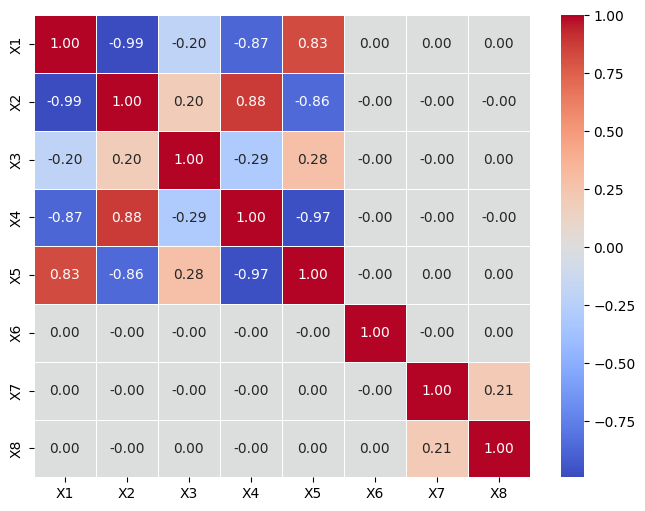

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(X_scaled_dataset4, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

*4.3. Apply Linear Regression to the preprocessed dataset*

In [ ]:
simple_imputer_dataset4 = SimpleImputer()
X_train = simple_imputer_dataset4.fit_transform(X_train_dataset4)
X_test = simple_imputer_dataset4.transform(X_test)

linear_regression_model_dataset4 = LinearRegression()
linear_regression_model_dataset4.fit(X_train_dataset4, Y_train_dataset4)

y_pred_dataset4 = linear_regression_model_dataset4.predict(X_test_dataset4)
mse_dataset4 = mean_squared_error(Y_test_dataset4, y_pred_dataset4)
r2_dataset4 = r2_score(Y_test_dataset4, y_pred_dataset4)

print('MSE: ', mse_dataset4)
print('R2: ', r2_dataset4)

MSE:  9.153207645941674
R2:  0.9121846294352438


*4.4. Apply feature selection to find the best features and then train the Regression Model with these best features*

Selected Features: Index(['X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')
R2 Score: 0.8495069064175346


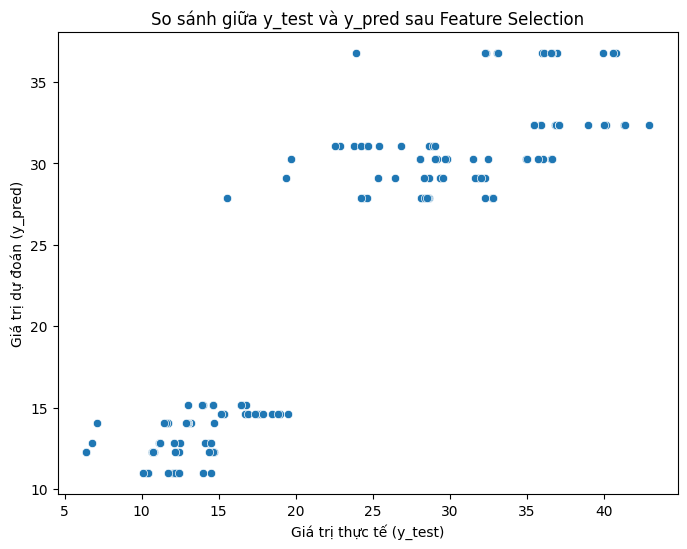

In [ ]:
selector_dataset4 = SelectKBest(score_func=f_regression, k=5)
X_train_best_selected_dataset4 = selector_dataset4.fit_transform(X_train_dataset4, Y_train_dataset4)
X_test_best_selected_dataset4 = selector_dataset4.transform(X_test_dataset4)

selected_features = features_name[selector_dataset4.get_support()]
print("Selected Features:", selected_features)

linear_regression_model_best_dataset4 = LinearRegression()
linear_regression_model_best_dataset4.fit(X_train_best_selected_dataset4, Y_train_dataset4)

y_best_pred_dataset4 = linear_regression_model_best_dataset4.predict(X_test_best_selected_dataset4)

r2_best_dataset4 = r2_score(Y_test_dataset4, y_best_pred_dataset4)
print("R2 Score:", r2_best_dataset4)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test_dataset4, y=y_best_pred_dataset4)
plt.xlabel("Giá trị thực tế (y_test)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.title("So sánh giữa y_test và y_pred sau Feature Selection")
plt.show()

*4.5. Compare the performance of the models (with and without feature selection) using RMSE, R2*

 Hiệu suất mô hình với tất cả features:
RMSE: 1.4772
R² Score: 0.9122
Hiệu suất mô hình với Feature Selection:
RMSE: 1.7250
R² Score: 0.8495


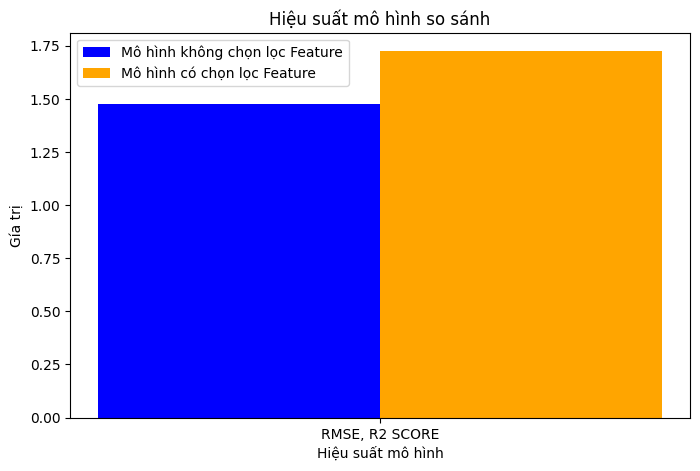

In [ ]:
# NO FEATURE
rmse_dataset4 = np.sqrt(mean_absolute_error(Y_test_dataset4, y_pred_dataset4))

print(" Hiệu suất mô hình với tất cả features:")
print(f"RMSE: {rmse_dataset4:.4f}")
print(f"R² Score: {r2_dataset4:.4f}")

# FEATURE
rmse_best_dataset4 = np.sqrt(mean_absolute_error(Y_test_dataset4, y_best_pred_dataset4))

print(f"Hiệu suất mô hình với Feature Selection:")
print(f"RMSE: {rmse_best_dataset4:.4f}")
print(f"R² Score: {r2_best_dataset4:.4f}")

metrics_dataset4 = ['RMSE, R2 SCORE']
value_original_dataset4 = [rmse_dataset4, r2_dataset4]
value_best_dataset4 = [rmse_best_dataset4, r2_best_dataset4]

x = np.arange(len(metrics_dataset4))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1_dataset4 = ax.bar(x - width/2, value_original_dataset4, width, label='Mô hình không chọn lọc Feature', color='blue')
bars2_dataset4 = ax.bar(x + width/2, value_best_dataset4, width, label='Mô hình có chọn lọc Feature', color='orange')

ax.set_xlabel('Hiệu suất mô hình')
ax.set_ylabel('Gía trị')
ax.set_title('Hiệu suất mô hình so sánh')
ax.set_xticks(x)
ax.set_xticklabels(metrics_dataset4)
ax.legend()